# Домашнее задание по курсу "Динамическая оптимизация в экономике и финансах" 

Краевский Артем Андреевич БЭК193

Для начала определимся с параметрами, необходимыми для решения задач, исходя из моего ФИО:


In [1]:
a1 = 12
a2 = 18
a3 = 1

In [2]:
b1 = 1
b2 = 18
b3 = 20

In [3]:
c1 = 1
c2 = 15
c3 = 5

# Задание 1.


Численно найдите экстремум функционала:


$$\int\limits_0^2 {{y'}^2+ 12y'y+y^2+ye^{2t}dt}$$

$$y(0)=-18$$

$$y(2)=20$$


### Решение

Для начала импортируем необходимые библиотеки для решения задачи вариационного исчисления


In [4]:
import math
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Зададим частоту разбиения для дискретной шкалы времени

In [5]:
num_of_fractions = 51
t = np.linspace(0,2, num_of_fractions)
dt = t[1]-t[0]

Определим оптимизируемый функционал, будем использовать дискретный аналог интеграла - сумму

In [6]:
def f(y):
    return np.sum(((y[1:]-y[:-1]) / dt) ** 2 + a1*((y[1:]-y[:-1]) / dt) * y[:1] + b1* y[1:] ** 2 + c1 * y[1:] * np.exp(t[1:]))


Определим стартовые значения

In [7]:
y0 = [1.5 for x in range(0,num_of_fractions)]
bounds = [(None, None) for x in range(0,num_of_fractions)]
bounds[0], bounds[-1] = (-b2-10e-6, -b2+10e-6), (b3-10e-6, b3+10e-6)


Посчитаем результат и нарисуем график


In [8]:
res = minimize(f, y0, method = 'l-bfgs-b', bounds = bounds)

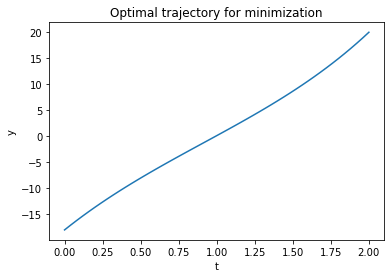

In [9]:
plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Optimal trajectory for minimization')
plt.show()

In [10]:
print('численное решение задачи оптимизации на заданном функционале с линейным разбиением:', res.x)

численное решение задачи оптимизации на заданном функционале с линейным разбиением: [-18.00001    -17.07734964 -16.18139631 -15.31030043 -14.46326592
 -13.63795211 -12.83394256 -12.04903113 -11.28268726 -10.53314533
  -9.79943515  -9.08002028  -8.37389163  -7.6795797   -6.99632401
  -6.32265986  -5.65770041  -5.00021883  -4.34894139  -3.70308371
  -3.06132078  -2.42290841  -1.78649529  -1.15115586  -0.51547244
   0.12159958   0.7611892    1.4045194    2.05250233   2.70643723
   3.36738394   4.03633337   4.71468465   5.40316488   6.10344543
   6.81641834   7.54376088   8.28644036   9.04601539   9.82346439
  10.62029403  11.43800949  12.27798052  13.14212004  14.03187291
  14.94875284  15.89458231  16.87077815  17.87913968  18.92164316
  20.00001   ]


Убедимся теперь, что верно нашли экстремаль, для этого попробуем максимизировать исходный функционал путём минимизации отрицательного значения заданной дискретной суммы (очевидно, что эти задачи аналогичны друг другу).

In [11]:
def f_max(y):
    return -np.sum(((y[1:]-y[:-1]) / dt) ** 2 + a1*((y[1:]-y[:-1]) / dt)* y[:1] + b1* y[1:] ** 2 + c1 * y[1:] * np.exp(t[1:]))

In [12]:
res_max = minimize(f_max, y0, method = 'l-bfgs-b', bounds = bounds)

<ipython-input-11-d992e99b1ef3>:2: RuntimeWarning: overflow encountered in square
  return -np.sum(((y[1:]-y[:-1]) / dt) ** 2 + a1*((y[1:]-y[:-1]) / dt)* y[:1] + b1* y[1:] ** 2 + c1 * y[1:] * np.exp(t[1:]))
D:\Anaconda\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


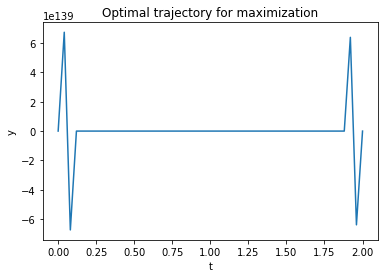

In [13]:
plt.plot(t, res_max.x)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Optimal trajectory for maximization')
plt.show()

Видим, что не выполняются условия Коши исходной задачи, да и функция совсем не выглядит как что-то гладкое, очевидно - найденный нами минимум является единственным численным решением задачи поиска экстремума.

# Задание 2


Численно найдите экстремум функционала: 

$$\int\limits_0^2 {(y - 18u)dt}$$ 

$$y' = y + u $$

$$ y(0) = 12, y(2) \in \mathbb{R}$$


$$u(t) \in {[-1, 15]} $$


### Решение

Для начала подгрузим необходимую нам библиотеку (в Юпитере по дефолту она не предустановлена) и инициализируем модель

In [14]:
pip install gekko

Note: you may need to restart the kernel to use updated packages.


In [15]:
from gekko import GEKKO
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,2,nt)

Определим основные переменные

In [16]:
y = m.Var(value=a1)
z = m.Var(value=0)
u = m.Var(value=0, lb = -c1, ub = c2)
t = m.Var(value=0)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

Теперь определим исходный функционал и заданные в условии соотношения

In [17]:
m.Equation(y.dt()==a3 * y + u)
m.Equation(z.dt()==b1 * y - b2 * u)
m.Equation(t.dt() == 1)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)

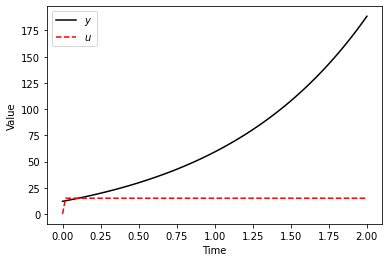

In [18]:
plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

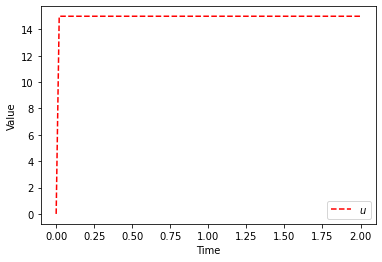

In [19]:
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

Заметим, что функция u не имеет "переключений" режима управления в силу коэффициента a3 = 1 и линейнойсти оптимизируемого функционала , для такой композиции оптимальный режим постоянен (можно убедиться, что режим будет переключаться, подставив a3 = 2, например, или добавив под интеграл нелинейную зависимость от u).

In [20]:
print('Численный экстремум функционала на заданном интервале для линейного разбиения:', y.value)

Численный экстремум функционала на заданном интервале для линейного разбиения: [12.0, 12.55102041, 13.113286134, 13.687026669, 14.272476194, 14.869873669, 15.479462929, 16.101492786, 16.73621713, 17.383895032, 18.044790851, 18.719174339, 19.407320756, 20.109510977, 20.82603161, 21.557175114, 22.303239914, 23.064530527, 23.841357682, 24.634038453, 25.442896382, 26.268261616, 27.110471039, 27.969868409, 28.846804501, 29.741637248, 30.654731888, 31.586461112, 32.537205219, 33.507352266, 34.497298233, 35.507447179, 36.538211409, 37.590011645, 38.663277191, 39.758446115, 40.875965426, 42.016291254, 43.179889037, 44.367233713, 45.578809914, 46.815112159, 48.076645063, 49.363923536, 50.677472998, 52.017829592, 53.385540403, 54.781163679, 56.205269062, 57.658437821, 59.141263085, 60.654350089, 62.19831642, 63.773792268, 65.381420684, 67.021857843, 68.695773311, 70.40385032, 72.146786043, 73.925291883, 75.740093761, 77.591932411, 79.481563687, 81.409758867, 83.377304969, 85.385005072, 87.433678

# Задача 6(3). 

Численно найдите экстремаль следующего функционала:

$$\int\limits_0^{\frac{\pi}{2}} {({y'} ^ 2 - y ^ 2)dt} $$ 

$$ y(0) = 1, 
y(\dfrac{\pi}{2}) = 2 $$

### Решение

Зададим частоту разбиения для дискретной шкалы времени

In [21]:
num_of_fractions = 51
t = np.linspace(0,np.pi/2, num_of_fractions)
dt = t[1]-t[0]

Определим оптимизируемый функционал, будем использовать дискретный аналог интеграла - сумму

In [22]:
def f(y):
    return np.sum(((y[1:]-y[:-1]) / dt) ** 2 -y[1:] ** 2 )


Определим стартовые значения

In [23]:
y0 = [1.5 for x in range(0,num_of_fractions)]
bounds = [(None, None) for x in range(0,num_of_fractions)]
bounds[0], bounds[-1] = (1-10e-6, 1+10e-6), (2-10e-6, 2+10e-6)


In [24]:
res = minimize(f, y0, method = 'l-bfgs-b', bounds = bounds)

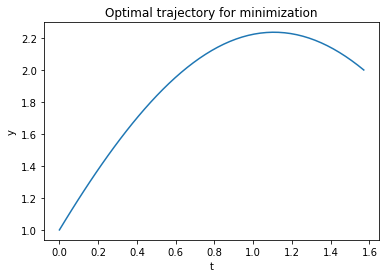

In [25]:
plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Optimal trajectory for minimization')
plt.show()

In [26]:
print('численное решение задачи оптимизации на заданном функционале с линейным разбиением:', res.x)

численное решение задачи оптимизации на заданном функционале с линейным разбиением: [1.00001    1.06235513 1.123651   1.1838353  1.2428501  1.30063552
 1.357136   1.41229518 1.46605879 1.51837301 1.56918768 1.61845125
 1.6661165  1.71213757 1.75646801 1.7990668  1.839891   1.87889979
 1.91605594 1.95131924 1.98465795 2.01603671 2.04542682 2.07280034
 2.09812922 2.12138987 2.14255814 2.16161014 2.17852865 2.19329337
 2.20589174 2.21631257 2.2245458  2.23058639 2.23442704 2.23606408
 2.23549571 2.23271927 2.22774017 2.22056025 2.21118842 2.19963384
 2.18590737 2.17002274 2.15199576 2.1318439  2.10958772 2.08525117
 2.05885773 2.03043526 2.00001   ]


Убедимся теперь, что верно нашли экстремаль, для этого попробуем максимизировать исходный функционал путём минимизации отрицательного значения заданной дискретной суммы (очевидно, что эти задачи аналогичны друг другу).

In [27]:
def f_max(y):
    return -np.sum(((y[1:]-y[:-1]) / dt) ** 2 -y[1:] ** 2 )


In [28]:
res_max = minimize(f_max, y0, method = 'l-bfgs-b', bounds = bounds)

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-27-a86019915983>:2: RuntimeWarning: overflow encountered in square
  return -np.sum(((y[1:]-y[:-1]) / dt) ** 2 -y[1:] ** 2 )
<ipython-input-27-a86019915983>:2: RuntimeWarning: invalid value encountered in subtract
  return -np.sum(((y[1:]-y[:-1]) / dt) ** 2 -y[1:] ** 2 )


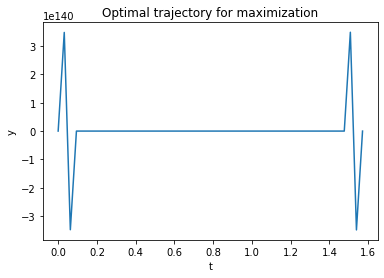

In [29]:
plt.plot(t, res_max.x)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Optimal trajectory for maximization')
plt.show()

Видим, что не выполняются условия Коши исходной задачи, да и функция совсем не выглядит как что-то гладкое, очевидно - найденный нами минимум является единственным численным решением задачи поиска экстремума.

# Задача 7. (4)

Численно решите следующую задачу оптимального управления:

$$ \int\limits_0^{10} {(y(t)-cos(t))^2 + u^2(t)dt} \to min $$

$$y(0) = 0$$
$$u(t) \in \mathbb{R}$$

(a)     $$y'(t) = u(t) $$

### Решение

Создадим объект класса и зададим шкалу времени линейным разбиением

In [30]:
m = GEKKO(remote=False)
nt = 201
m.time = np.linspace(0,10,nt)

Определим основные переменные

In [31]:
y = m.Var(value=0)
z = m.Var(value=0)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

Теперь определим исходный функционал и заданные в условии соотношения

In [32]:
m.Equation(y.dt()== u)
m.Equation(t.dt() == 1)
m.Equation(z.dt()== (y-m.cos(t))**2 + u**2)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)

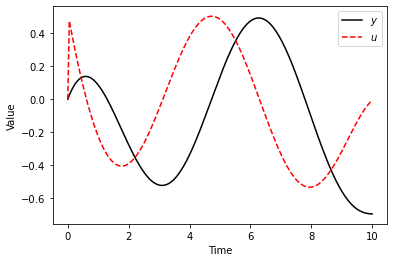

In [33]:
plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Замечу, что здесь косинус вызывается через функции объекта класса используемой нами библиотеки, при попытке завернуть переменную объекта gekko в np.cos() или в math.cos() возникает ошибка рассогласования форматов 

In [34]:
print('Численный экстремум функционала на заданном интервале для линейного разбиения:', y.value)

Численный экстремум функционала на заданном интервале для линейного разбиения: [0.0, 0.023759164023, 0.045080850305, 0.064027728299, 0.080662747919, 0.095049257965, 0.1072511101, 0.11733274879, 0.12535928757, 0.13139657208, 0.13551123027, 0.13777071012, 0.13824330545, 0.13699817001, 0.13410532049, 0.12963562881, 0.12366080402, 0.11625336447, 0.10748660047, 0.097434528051, 0.086171834227, 0.073773814224, 0.060316301136, 0.045875588498, 0.030528346229, 0.014351530439, -0.0025777124308, -0.020182146653, -0.03838455296, -0.057107838506, -0.076275150572, -0.095809993519, -0.11563634852, -0.13567879558, -0.15586263742, -0.17611402461, -0.19636008172, -0.2165290338, -0.23655033285, -0.25635478381, -0.27587466965, -0.29504387508, -0.31379800847, -0.33207452161, -0.3498128269, -0.36695441146, -0.38344294799, -0.39922440184, -0.414247134, -0.42846199971, -0.44182244228, -0.45428458192, -0.46580729917, -0.47635231279, -0.4858842517, -0.49437072089, -0.50178236093, -0.50809290102, -0.51327920527, 

(b)
$$ y'(t) = u(t) + y(t)$$

Создадим объект класса и зададим шкалу времени линейным разбиением

In [35]:
m = GEKKO(remote=False)
nt = 201
m.time = np.linspace(0,10,nt)

Определим основные переменные

In [36]:
y = m.Var(value=0)
z = m.Var(value=0)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

Теперь определим исходный функционал и заданные в условии соотношения

In [37]:
m.Equation(y.dt()== u + y)
m.Equation(t.dt() == 1)
m.Equation(z.dt()== (y-m.cos(t))**2 + u**2)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)

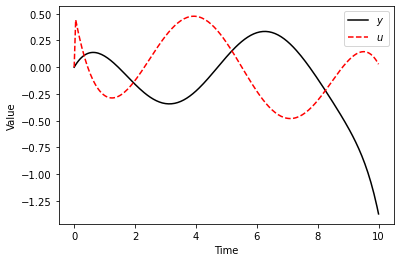

In [38]:
plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [39]:
print('Численный экстремум функционала на заданном интервале для линейного разбиения:', y.value)

Численный экстремум функционала на заданном интервале для линейного разбиения: [0.0, 0.023294371621, 0.044083055038, 0.062485322521, 0.07861443097, 0.092578177008, 0.10447940708, 0.11441648537, 0.12248372224, 0.12877176556, 0.13336795737, 0.13635665801, 0.13781953968, 0.13783585153, 0.13648265786, 0.13383505136, 0.12996634286, 0.12494822902, 0.1188509397, 0.11174336593, 0.10369317016, 0.094766879749, 0.085029964895, 0.074546902168, 0.063381224607, 0.051595559402, 0.039251654081, 0.026410392128, 0.013131798852, -0.00052496164862, -0.014501597656, -0.028740708393, -0.043185809247, -0.057781362985, -0.072472816295, -0.087206641022, -0.1019303795, -0.11659269341, -0.13114341559, -0.14553360425, -0.15971559917, -0.17364307925, -0.18727112108, -0.20055625802, -0.21345653929, -0.22593158889, -0.23794266363, -0.24945271023, -0.26042642089, -0.27083028715, -0.28063265162, -0.28980375737, -0.29831579464, -0.30614294465, -0.31326142016, -0.31964950277, -0.3252875765, -0.33015815764, -0.3342459205


# Задача 8(5)

Популяция осиного улья может быть описана следующими уравнениями:
$$\begin{cases}
    \dot x = (\alpha u(t) - \beta)x(t), x(0) = 1\\
    \dot y = \gamma(1-u(t))x(t), y(0) = 0
  \end{cases}$$
  
$$ \alpha, \beta, \gamma \in \mathbb{R} ^ {+}$$

$$ u(t) \in [0, 1]$$

Численно исследуйте траектории управления и траектории состояния для различных параметров α, β, γ, если задача улья состоит в максимизации числа ос-королев в последний момент
времени (его можно выбрать любым, достаточно большим)


### Решение

Библиотека, которую мы используем, видимо, очень придирчива к времени выполнения, поэтому если не ставить адекватные ограничения на параметры и временную шкалу - отказывается решать задачу, опытным путём было установлено, что можно брать все параметры в интервале (0,10] и время из [0,1], однако если брать параметры из (0,1], то время можно брать из интервала [0,15] (возможно, больше, я смотрел в разбиении на 51 подинтервал)

Давайте будем решаать задачу для $ t \in [0,15]$ и $\alpha, \beta, \gamma \in (0,1]$

In [171]:
t_lim = (0, 15)

Создадим объект класса и зададим шкалу времени линейным разбиением

In [172]:
m = GEKKO(remote= False)
nt = 51
tm = np.linspace(t_lim[0],t_lim[1], nt)
m.time = tm

x = m.Var(value=1)
y = m.Var(value=0)


Инициализируем параметры модели и переменную управления

In [173]:
alpha_lim = (0,1)
beta_lim = (0,1)
gamma_lim = (0,1)

In [174]:
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

alpha = m.FV(value=1.0, lb=alpha_lim[0], ub = alpha_lim[1])
alpha.STATUS = 1

beta = m.FV(value=1.0, lb=beta_lim[0], ub = beta_lim[1])
beta.STATUS = 1

gamma = m.FV(value=1.0, lb=gamma_lim[0], ub = gamma_lim[1])
gamma.STATUS = 1

u = m.MV(value=0, lb=0, ub=1)
u.STATUS = 1

Выпишем систему диффуров и зададим оптимизационную задачу максимизации конечного состояния количества ос-королев (у нас это переменная у) - здесь она с минусом, потому что дефолтная задача в библиотеке - минимизация, как мы обсуждали ранее, эта задача будет эквивалентна задаче максимизации.

In [175]:

m.Equation(x.dt() == (u * alpha-beta)*x)
m.Equation(y.dt() == gamma*(1-u)*x)

m.Obj(-y)



m.options.IMODE = 6
m.solve(disp=False)

Ну и нарисуем красивы графичек (я ещё отдельно нарисую график для переменной управления, чтобы её не съедали размерности)

Найденное alpha: 1.0
Найденное beta: 0.0
Найденное gamma: 1.0


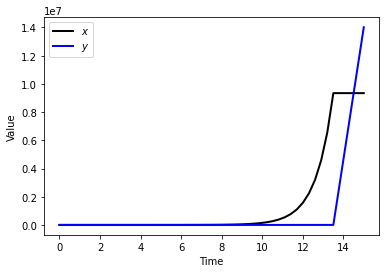

In [176]:


print('Найденное alpha: ' + str(alpha.value[0]))
print('Найденное beta: ' + str(beta.value[0]))
print('Найденное gamma: ' + str(gamma.value[0]))


plt.figure(1)
plt.plot(tm, x.value, 'k-', linewidth=2, label=r'$x$')
plt.plot(tm, y.value, 'b-', linewidth=2, label=r'$y$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

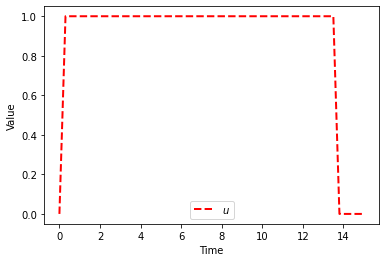

In [177]:
plt.plot(tm, u.value, 'r--', linewidth=2, label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### На всякий случай я проделаю аналогичные действия для достаточно небольших значений времени и больших значений параметров

Найденное alpha: 10.0
Найденное beta: 0.0
Найденное gamma: 10.0


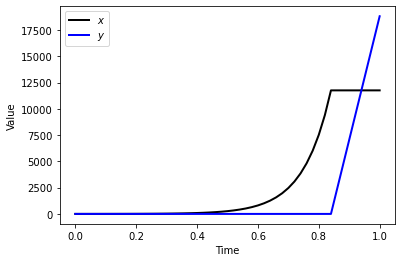

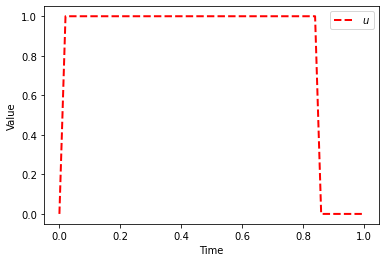

In [187]:
t_lim = (0, 1)
m = GEKKO(remote= False)
nt = 51
tm = np.linspace(t_lim[0],t_lim[1], nt)
m.time = tm

x = m.Var(value=1)
y = m.Var(value=0)

alpha_lim = (0, 10)
beta_lim = (0,10)
gamma_lim = (0,10)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

alpha = m.FV(value=1.0, lb=alpha_lim[0], ub = alpha_lim[1])
alpha.STATUS = 1

beta = m.FV(value=1.0, lb=beta_lim[0], ub = beta_lim[1])
beta.STATUS = 1

gamma = m.FV(value=1.0, lb=gamma_lim[0], ub = gamma_lim[1])
gamma.STATUS = 1

u = m.MV(value=0, lb=0, ub=1)
u.STATUS = 1


m.Equation(x.dt() == (u * alpha-beta)*x)
m.Equation(y.dt() == gamma*(1-u)*x)

m.Obj(-y)



m.options.IMODE = 6
m.solve(disp=False)



print('Найденное alpha: ' + str(alpha.value[0]))
print('Найденное beta: ' + str(beta.value[0]))
print('Найденное gamma: ' + str(gamma.value[0]))


plt.figure(1)
plt.plot(tm, x.value, 'k-', linewidth=2, label=r'$x$')
plt.plot(tm, y.value, 'b-', linewidth=2, label=r'$y$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(tm, u.value, 'r--', linewidth=2, label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()